# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few type of classification problem:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

### Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now ... let's visualize it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


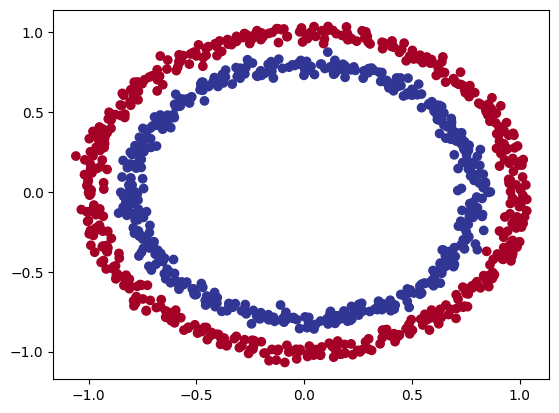

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [ ]:
# Vew the first example of feature and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with Tensorflow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate....

In [ ]:
import tensorflow as tf

# set random seed
tf.random.set_seed(42)

# create the model using sequential api
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 5.6605 - accuracy: 0.4820
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 3.9050 - accuracy: 0.4820
Epoch 3/5
32/32 [==============================] - 0s 901us/step - loss: 1.7814 - accuracy: 0.5020
Epoch 4/5
32/32 [==============================] - 0s 944us/step - loss: 0.7359 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7061 - accuracy: 0.4900


In [ ]:
# Let's try and improbe our model by training for longer
model_1.fit(X, y, epochs=200,verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classificatoin problem and our model is getting around ~50% accuracy it's performing as it it's guessing.

So let's setp hings up a notch and add an extra layer.

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the model using Sequential api
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5000


[0.6943357586860657, 0.5]

In [ ]:
# improbing our model

# set random seed
tf.random.set_seed(42)

# create a model using Sequential api
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the modle
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"]
               )

# fit the model
history = model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
# evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 1s 3ms/step - loss: 0.7001 - accuracy: 0.5100


[0.7000536322593689, 0.5099999904632568]

<Axes: >

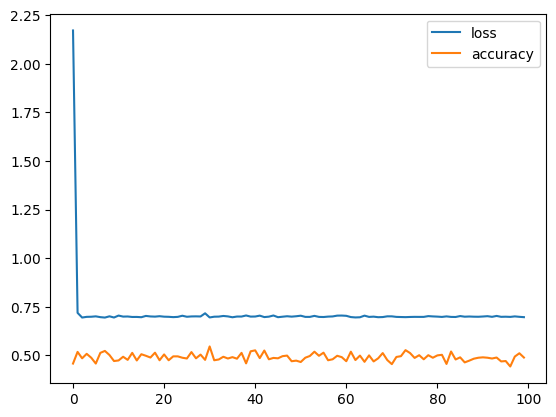

In [ ]:
pd.DataFrame(history.history).plot()

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

    * Take in a trained model, features (X) and labels (y)
    * Create a meshgrid of the different X values
    * Make predictions across the meshgrid
    * Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # create x value (we're gonig to make predictions on these)
    X_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(X_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("dong multiclass classification")
        # we have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)


    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [ ]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

313/313 [==============================] - 1s 2ms/step
doing binary classification


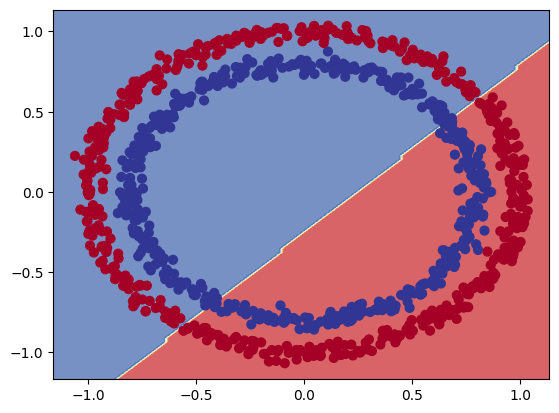

In [ ]:
# check out the predictoins our model is making
plot_decision_boundary(model=model_3,
                        X=X,
                      y=y)

313/313 [==============================] - 0s 1ms/step
doing binary classification


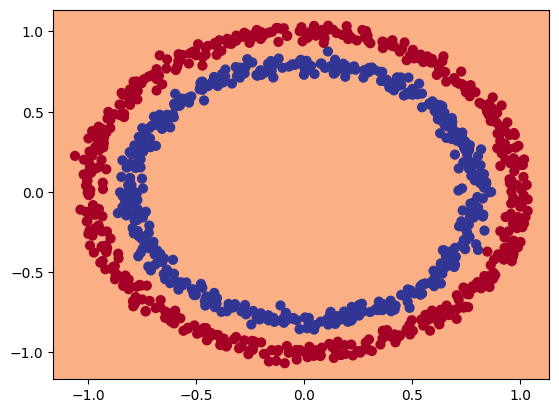

In [ ]:
# check out the predictoins our model is making
plot_decision_boundary(model=model_2,
                        X=X,
                      y=y)

313/313 [==============================] - 0s 1ms/step
doing binary classification


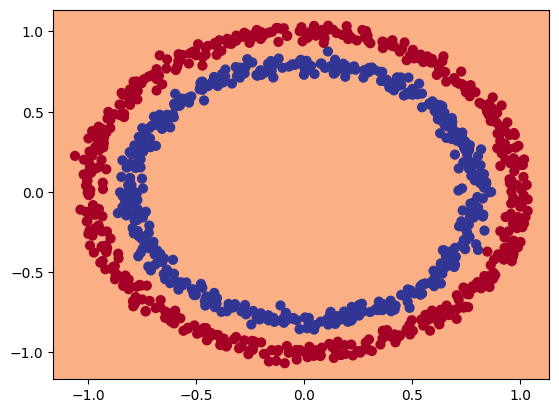

In [ ]:
# check out the predictoins our model is making
plot_decision_boundary(model=model_1,
                        X=X,
                      y=y)

### The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model with sequential api
model_4 = tf.keras.Sequential([
#     tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# compile the model
model_4.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics="accuracy")

# fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 5.5800 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 936us/step - loss: 5.4975 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 950us/step - loss: 5.4916 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 5.4882 - accuracy: 0.4810
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.4853 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 961us/step - loss: 5.4829 - accuracy: 0.4790
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.4803 - accuracy: 0.4800
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 5.4621 - accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 978us/step - loss: 5.4001 - accuracy: 0.4800
Epoch 10/100
32/32 [==============================] - 0s 977us/step - loss: 5.3729 - accuracy: 0.4800

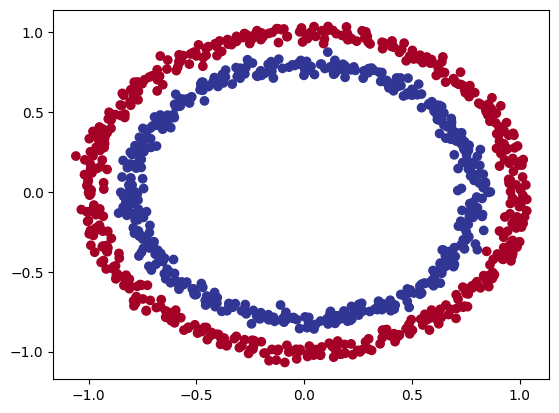

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 787us/step
doing binary classification


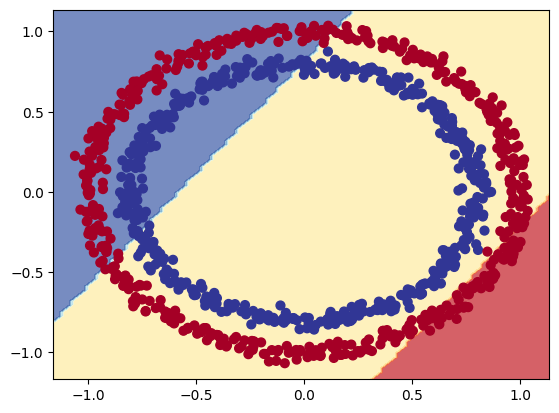

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y)

### Let's try build our first neural netwrok with a non-lnear function

In [ ]:
# set random seed
tf.random.set_seed(42)

# create model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)

])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.legacy.Adam(lr=0.001),
               metrics=['accuracy']
               )

# fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 6.3272 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3141 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2887 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2651 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2638 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2604 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2588 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2384 - accuracy: 0.4870
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2535 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2516 - accuracy: 0.4880
Epoch 11/100
32/32 [=

In [ ]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# set the random seed
tf.random.set_seed(42)

# create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
model_6.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

# fit the model
history = model_6.fit(X, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 1ms/step - loss: 5.0355 - accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 4.7383 - accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 4.3921 - accuracy: 0.5000
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 4.0723 - accuracy: 0.5000
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 3.4217 - accuracy: 0.5000
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 2.8974 - accuracy: 0.5000
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 2.5228 - accuracy: 0.5000
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 2.0788 - accuracy: 0.4090
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 0.9943 - accuracy: 0.4030
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.8114 - accuracy: 0.4520


In [ ]:
# evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 975us/step - loss: 0.8021 - accuracy: 0.4560


[0.8021059632301331, 0.4560000002384186]

313/313 [==============================] - 0s 762us/step
doing binary classification


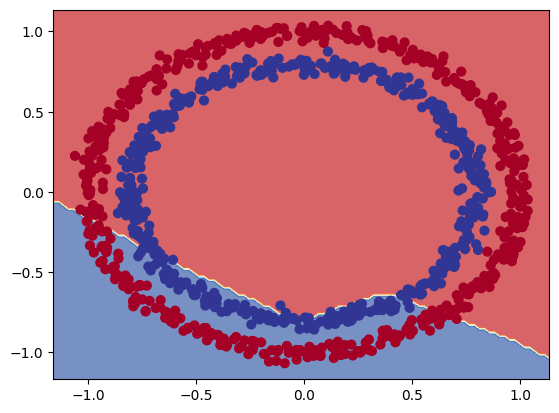

In [ ]:
# How do our model predictions look
plot_decision_boundary(model_6, X, y)

In [ ]:
# set random seed
tf.random.set_seed(42)

# create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.legacy.Adam(),
               metrics=['accuracy'])

# fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7191 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 996us/step - loss: 0.7103 - accuracy: 0.4950
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7058 - accuracy: 0.4940
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7031 - accuracy: 0.4890
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7012 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6992 - accuracy: 0.4680
Epoch 7/100
32/32 [==============================] - 0s 984us/step - loss: 0.6971 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 945us/step - loss: 0.6956 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.4890
Epo

In [ ]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1515 - accuracy: 0.9990


[0.15154798328876495, 0.9990000128746033]

313/313 [==============================] - 0s 950us/step
doing binary classification


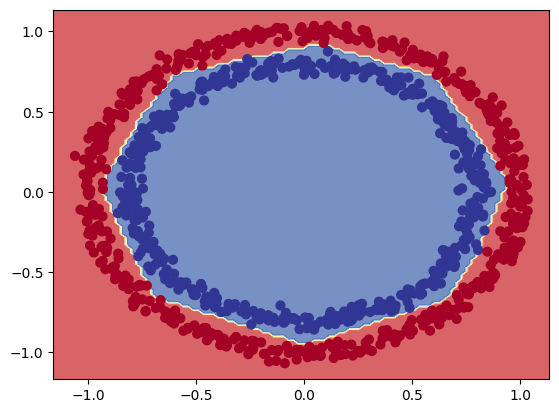

In [ ]:
# visualize the data
plot_decision_boundary(model_7, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics= "accuracy")
# 3. Fit the model
history = model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7027 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.4950
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.4920
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.4910
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4970
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.4540
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.4640
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.4950
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5150
Epoch 11/

In [ ]:
# Evaluate the model
model_8.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 1.0000


[0.030649757012724876, 1.0]

313/313 [==============================] - 0s 757us/step
doing binary classification


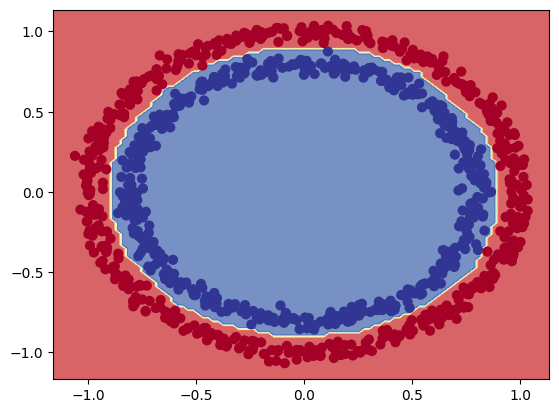

In [ ]:
# visualize the data
plot_decision_boundary(model=model_8, X=X, y=y)

In [ ]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
# create a toy tensor (smilar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

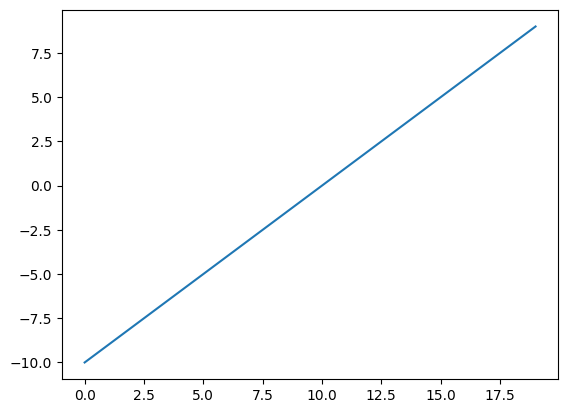

In [ ]:
# visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

In [ ]:
# use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

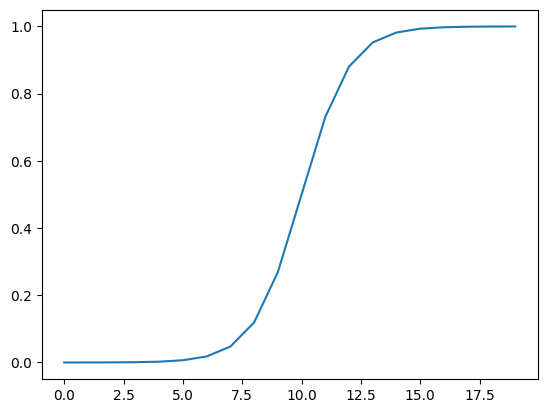

In [ ]:
# plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))


In [ ]:
# let's recreate the relu function

def relu(x):
    return tf.maximum(0, x)

In [ ]:
# pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

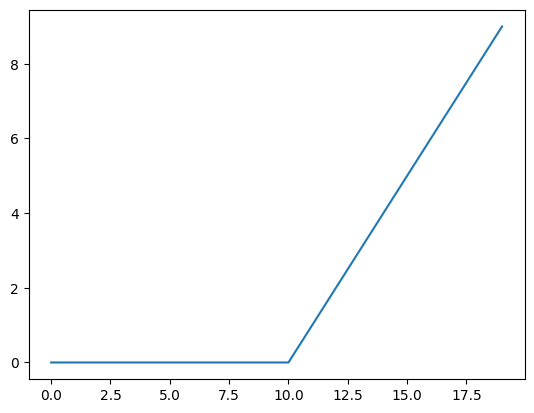

In [ ]:
# plot our toy tensor transforme by relu
plt.plot(relu(A))

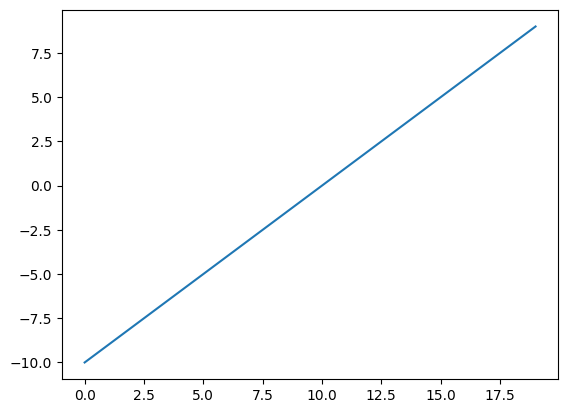

In [ ]:
plt.plot(A)

In [ ]:
# Let's try the linear activation function

tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

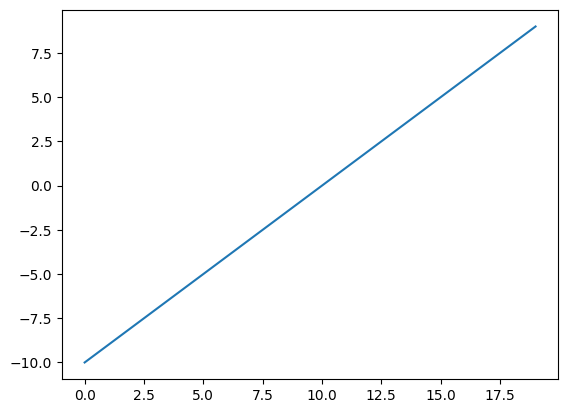

In [ ]:
# Does the linear activatons functoin change anything
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# does A even change
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

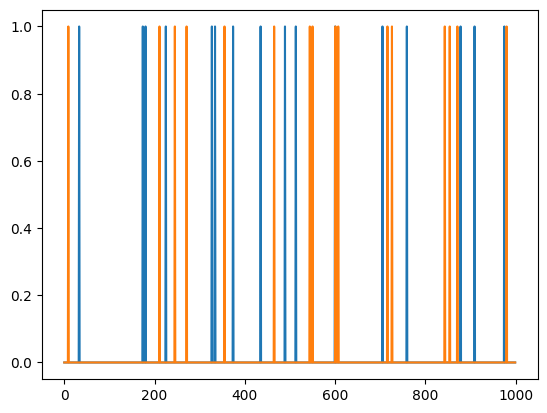

In [ ]:
# what our data look like on relu function without parameter tuning
plt.plot(relu(X))

In [ ]:
# let's load the model from colab
# colab_model = tf.keras.models.load_model('model_7.h5')

In [ ]:
# plot_decision_boundary(model=colab_model, X=X, y=y)

In [ ]:
# colab_model.summary()

In [ ]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 5)                 15        
                                                                 
 dense_12 (Dense)            (None, 5)                 30        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# colab_model.load_weights('./model_7_weights.h5')

In [ ]:
# plot_decision_boundary(model_7, X, y)

### Evaluating and improving our classification

In [ ]:
# Chaeck how many examples we have
len(X)

1000

In [ ]:
# train test spilit
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
#create model

# set random seed
tf.random.set_seed(42)

# create model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# fit the model
history = model_9.fit(X_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
20/20 [==============================] - 1s 9ms/step - loss: 0.6829 - accuracy: 0.5188 - val_loss: 0.7065 - val_accuracy: 0.4187
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.5188 - val_loss: 0.7045 - val_accuracy: 0.4187
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5188 - val_loss: 0.7022 - val_accuracy: 0.4187
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5188 - val_loss: 0.7003 - val_accuracy: 0.4187
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.5188 - val_loss: 0.6981 - val_accuracy: 0.4187
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.5813 - val_loss: 0.6912 - val_accuracy: 0.5688
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.5437 - val_loss: 0.6938 - val_accuracy: 0.4500
Epoch 8/200
2

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model_9.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/7 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Test Loss: 0.0051931822672486305
Test Accuracy: 1.0


In [ ]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Create model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

# Define callbacks for early stopping and model checkpointing
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
]

# Fit the model with validation split and callbacks
history = model_10.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=callbacks)


Epoch 1/200
20/20 [==============================] - 1s 23ms/step - loss: 0.6876 - accuracy: 0.5203 - val_loss: 0.7049 - val_accuracy: 0.4187
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.5188 - val_loss: 0.7046 - val_accuracy: 0.4187
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6782 - accuracy: 0.5188 - val_loss: 0.7009 - val_accuracy: 0.4187
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 0.6734 - accuracy: 0.5188 - val_loss: 0.6966 - val_accuracy: 0.4187
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - loss: 0.6695 - accuracy: 0.5188 - val_loss: 0.6922 - val_accuracy: 0.4437
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6648 - accuracy: 0.5813 - val_loss: 0.6818 - val_accuracy: 0.5500
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6574 - accuracy: 0.5547 - val_loss: 0.6814 - val_accuracy: 0.4688
Epoch 8/200


In [ ]:
# Load the best saved model
model_10.load_weights("best_model.h5")

# Evaluate the model
test_loss, test_accuracy = model_10.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/7 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Test Loss: 0.003380092792212963
Test Accuracy: 1.0


In [ ]:
# set random seed tf.random_set
tf.random.set_seed(42)

# create a model(same as model_9)
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_11.compile(loss="binary_crossentropy",
                 optimizer="Adam",
                 metrics=["accuracy"])

# Creating a learning rate callback
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4* 10**(epoch/20))

# fit the model
history_11 = model_9.fit(X_train, y_train, epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

<Axes: >

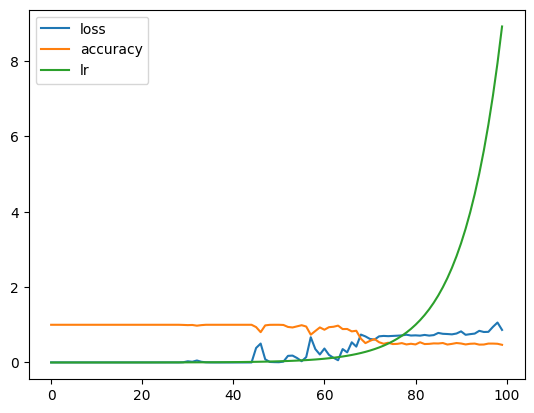

In [ ]:
# Checkout the history
pd.DataFrame(history_11.history).plot()

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [ ]:
len(lrs)

100

Text(0.5, 1.0, 'Learning rate vs loss')

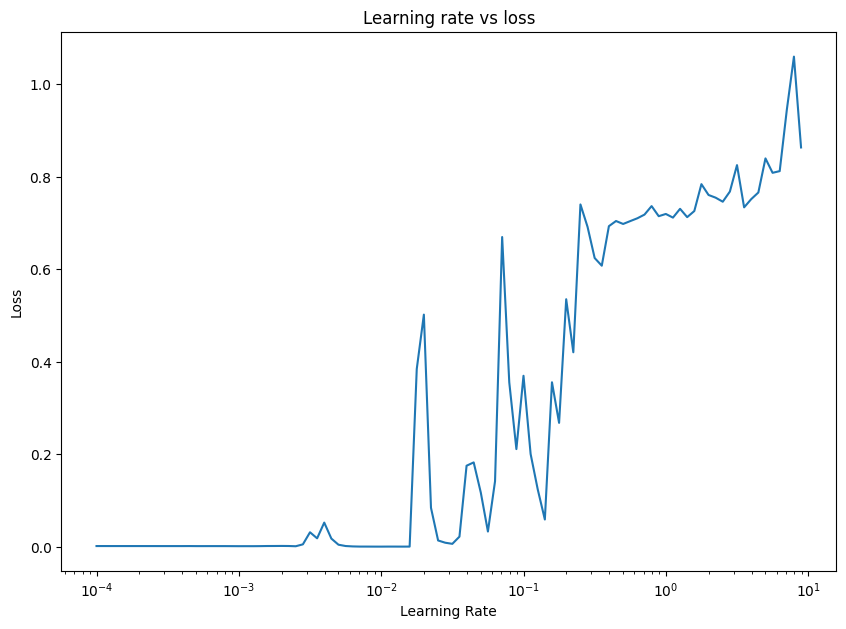

In [ ]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_11.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

In [ ]:
# Example of other typical learning rates values:

10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try using a higher *ideal* learning rate with the same model

# set random seed
tf.random.set_seed(42)

# create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with ideal learning rate
model_12.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.01),
                 metrics=["accuracy"])

# Fit the model for 20 epochs
history_12 = model_12.fit(X_train, y_train, epochs=90)

Epoch 1/90
25/25 [==============================] - 1s 1ms/step - loss: 0.6909 - accuracy: 0.5225
Epoch 2/90
25/25 [==============================] - 0s 994us/step - loss: 0.6880 - accuracy: 0.5200
Epoch 3/90
25/25 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5275
Epoch 4/90
25/25 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.5337
Epoch 5/90
25/25 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.5362
Epoch 6/90
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5387
Epoch 7/90
25/25 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5412
Epoch 8/90
25/25 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5462
Epoch 9/90
25/25 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5475
Epoch 10/90
25/25 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.5487
Epoch 11/90
25/25

In [ ]:
# Evaluate model 10 on the test dataset
model_12.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.2385 - accuracy: 0.9900


[0.23849017918109894, 0.9900000095367432]

313/313 [==============================] - 0s 764us/step
doing binary classification
313/313 [==============================] - 0s 763us/step
doing binary classification


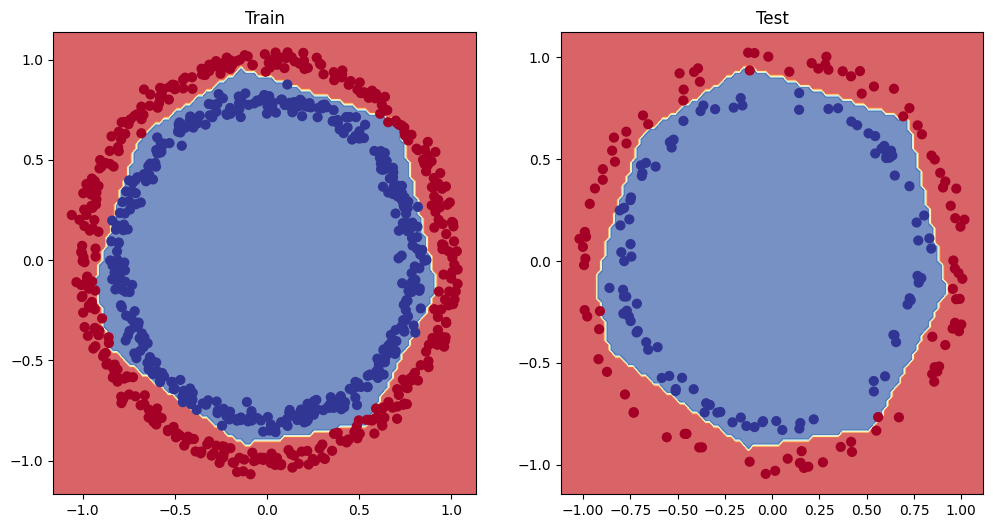

In [ ]:
# plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_12, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_12, X_test, y_test)
plt.show()

## MOre classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiear with;
* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification report (from scikit-learn)


In [ ]:
# check the accuracy of our model
loss, accuracy = model_12.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracyon the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.9900
Model loss on the test set: 0.23849017918109894
Model accuracyon the test set: 99.00%


In [ ]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix

# make predictions
y_preds = model_10.predict(X_test)

# # Create confusion matrix
# confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 1ms/step


In [ ]:
y_preds[:10]

array([[9.9994022e-01],
       [9.9999940e-01],
       [9.9998420e-01],
       [9.9999034e-01],
       [1.1107327e-02],
       [1.0138660e-05],
       [9.9948221e-01],
       [2.4471412e-06],
       [9.9998623e-01],
       [2.2569217e-05]], dtype=float32)

our predictions values are in continuous form so we need to change them to binary form

In [ ]:
# Convert predictions probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# create a confusoin matrix

confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [  0,  99]])

How about we prettify our confusion matrix?

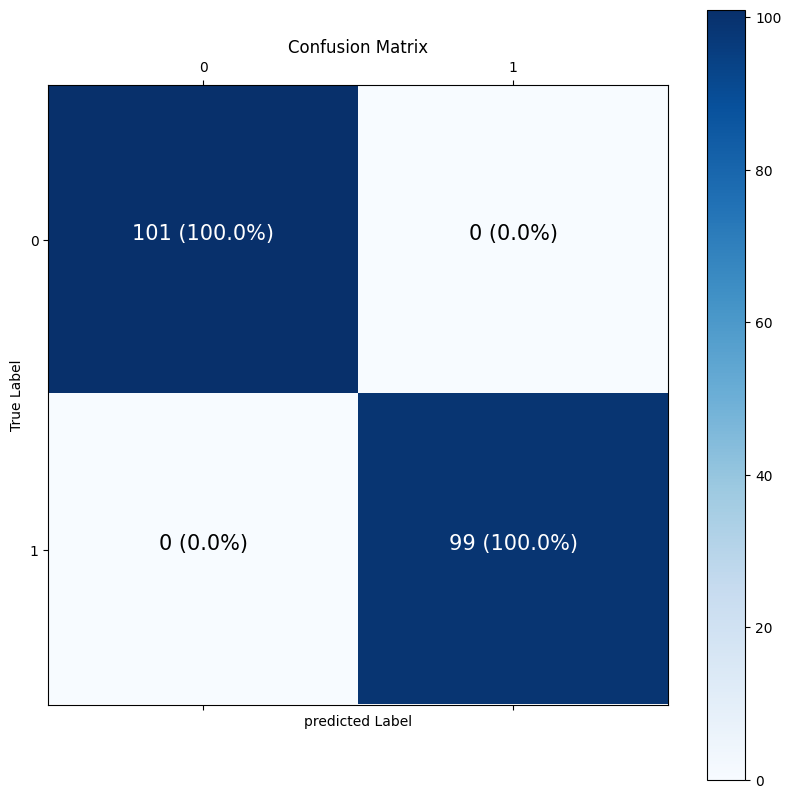

In [ ]:
# Note: the confusoin matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])


# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# set threshold for different color
threshold = (cm.max() + cm.min()) / 2.

# plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## Working with a larger example (multiclass classification)

When you have more than two clases as an option, it's known as **multi-clas classification**.

* This means if you have 3 different classes, it's multi-class classification
* It also means if you have 100 different classes, it's multi-class classification


To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

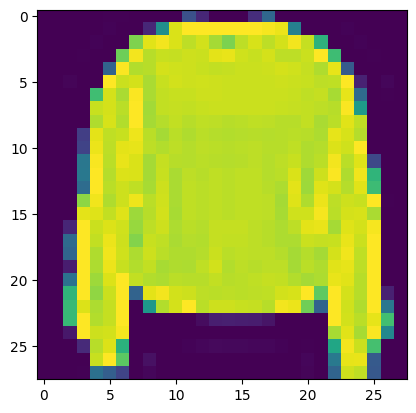

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
# Check out sample labels
train_labels[7]

2

In [ ]:
# Create a small list so we can index onto or training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal","Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

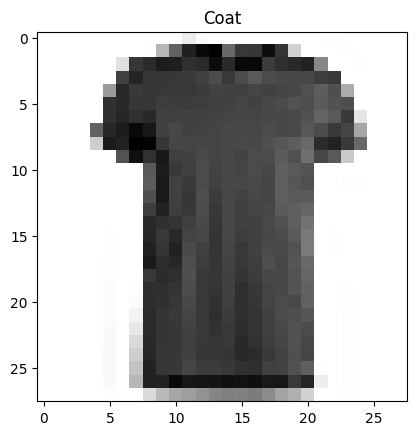

In [ ]:
# Plot an example image and its label
index_of_choice=2000
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

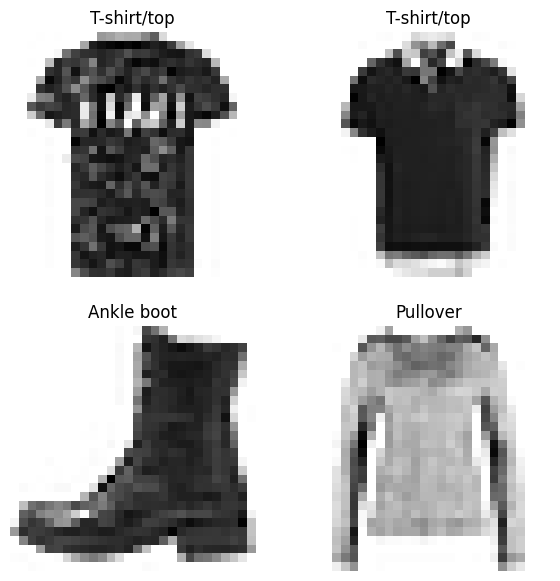

In [ ]:
# Plot multiple random images of fashion mnist
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our bineary classifiers, however we going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Out shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * if your labels oare one-hot encoded, use CategoricalCrossentropy()
  * if your labels are integer form use SparceCategoricalentopy()
* Output layer activation = Softmax (not sigmoid)

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
len(class_names)

10

In [ ]:
# set random seed
tf.random.set_seed(42)

# create a model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# fit the model
non_norm_history = model_13.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.4593 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
# check the model summary
model_13.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 4)                 3140      
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1

In [ ]:
# We can get our training and testing data between - & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

#check he min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# fit the model
norm_history = model_14.fit(train_data_norm,
             train_labels,
             epochs=10,
             validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4900 - accuracy: 0.4805 - val_loss: 1.0776 - val_accuracy: 0.6450
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9634 - accuracy: 0.6661 - val_loss: 0.9418 - val_accuracy: 0.6560
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8605 - accuracy: 0.6900 - val_loss: 0.8489 - val_accuracy: 0.6896
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8021 - accuracy: 0.7144 - val_loss: 0.8051 - val_accuracy: 0.7068
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7645 - accuracy: 0.7267 - val_loss: 0.7744 - val_accuracy: 0.7229
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7446 - accuracy: 0.7297 - val_loss: 0.7932 - val_accuracy: 0.7218
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7317 - accuracy: 0.7363 - val_loss: 0.7716 - val_accuracy:

> 🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1)

<Axes: title={'center': 'Normalized data'}>

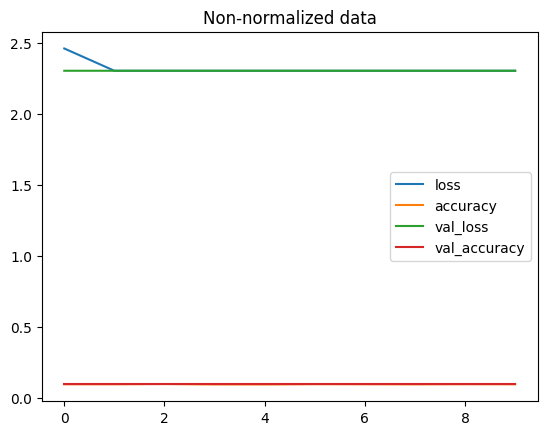

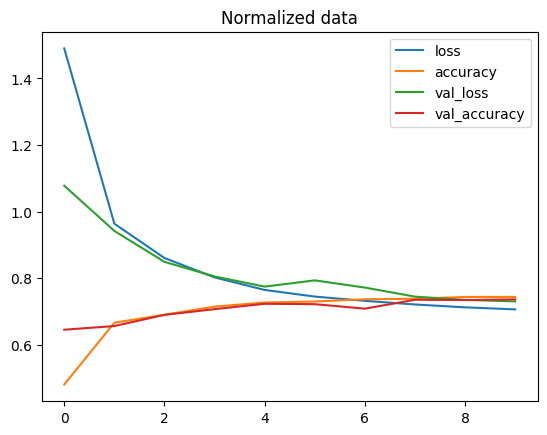

In [ ]:
import pandas as pd

# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

## Finding the ideal learnng rate

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create a model
model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model
find_lr_history = model_15.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0704 - accuracy: 0.6359 - val_loss: 0.8165 - val_accuracy: 0.7355 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6917 - accuracy: 0.7777 - val_loss: 0.6480 - val_accuracy: 0.7889 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5994 - accuracy: 0.7997 - val_loss: 0.6125 - val_accuracy: 0.7880 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5674 - accuracy: 0.8070 - val_loss: 0.5857 - val_accuracy: 0.7981 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5547 - accuracy: 0.8091 - val_loss: 0.5735 - val_accuracy: 0.8030 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5421 - accuracy: 0.8131 - val_loss: 0.6028 - val_accuracy: 0.7952 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 2s

Text(0.5, 1.0, 'Finding the ideal learning rate')

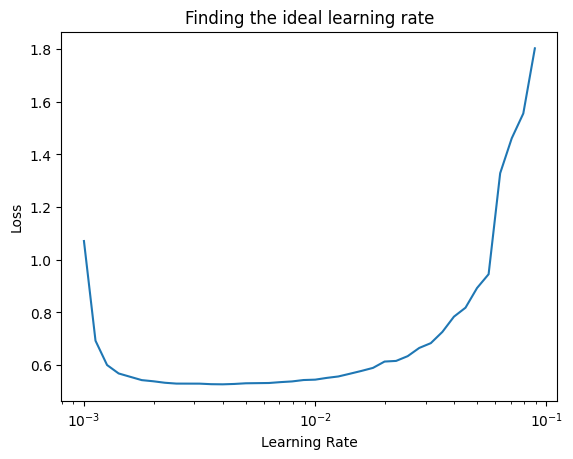

In [ ]:
# Plot the learnng rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# create model
model_16 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_16.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# fit the model
history_16 = model_16.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2179 - accuracy: 0.5407 - val_loss: 0.8624 - val_accuracy: 0.6823
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7575 - accuracy: 0.7282 - val_loss: 0.7334 - val_accuracy: 0.7476
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6615 - accuracy: 0.7714 - val_loss: 0.6568 - val_accuracy: 0.7741
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6119 - accuracy: 0.7929 - val_loss: 0.6243 - val_accuracy: 0.7859
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5887 - accuracy: 0.7991 - val_loss: 0.6193 - val_accuracy: 0.7878
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5736 - accuracy: 0.8030 - val_loss: 0.6374 - val_accuracy: 0.7779
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5644 - accuracy: 0.8079 - val_loss: 0.5984 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

In [ ]:
# Create a confuxion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # set labels to be the classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])


  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set threshold for different color
  threshold = (cm.max() + cm.min()) / 2.

  # plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predictions with our model
y_probs = model_16.predict(test_data_norm) # probs is short for "prediction probabilities"

# view the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 780us/step


array([[1.6523307e-05, 4.3266971e-13, 5.1694411e-08, 1.3017245e-07,
        5.9454635e-08, 3.9376187e-01, 2.5031506e-05, 3.4872245e-02,
        2.7064350e-03, 5.6861776e-01],
       [6.3637813e-04, 1.3412597e-07, 7.5179583e-01, 1.0470840e-04,
        1.5977794e-01, 1.5919474e-29, 8.7684609e-02, 0.0000000e+00,
        3.6663053e-07, 0.0000000e+00],
       [2.6388777e-06, 9.9418980e-01, 2.9582792e-04, 5.3395457e-03,
        1.6958169e-04, 1.0257171e-12, 2.6247646e-06, 6.7300087e-29,
        3.2928574e-10, 3.8122820e-30],
       [2.0659793e-06, 9.9486756e-01, 2.5603545e-04, 4.7329427e-03,
        1.3931589e-04, 4.8616243e-13, 2.0097793e-06, 1.3739381e-29,
        2.0325294e-10, 7.7897044e-31],
       [1.5569331e-01, 1.0442063e-07, 6.6801772e-02, 6.4016441e-03,
        1.4032157e-02, 7.3237978e-11, 7.4142945e-01, 0.0000000e+00,
        1.5641503e-02, 1.2273006e-33]], dtype=float32)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.6523307e-05, 4.3266971e-13, 5.1694411e-08, 1.3017245e-07,
        5.9454635e-08, 3.9376187e-01, 2.5031506e-05, 3.4872245e-02,
        2.7064350e-03, 5.6861776e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# convert all of the predictions probilities into integers
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 8, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[722,   0,   8,  86,   4,   4, 158,   0,  18,   0],
       [  1, 945,   9,  35,   6,   0,   1,   0,   3,   0],
       [  9,   2, 505,  33, 226,   1, 218,   0,   6,   0],
       [ 40,   9,  25, 828,  22,   4,  65,   0,   7,   0],
       [  1,   2,  59,  23, 790,   2, 107,   0,  16,   0],
       [  0,   0,   0,   0,   0, 909,   0,  40,  12,  39],
       [140,   1,  49,  54, 118,   4, 580,   0,  54,   0],
       [  0,   0,   0,   0,   0,  34,   0, 912,   0,  54],
       [  5,   1,   2,   6,   6,  31,  33,   3, 912,   1],
       [  0,   0,   0,   0,   0,  25,   0,  43,   4, 928]])

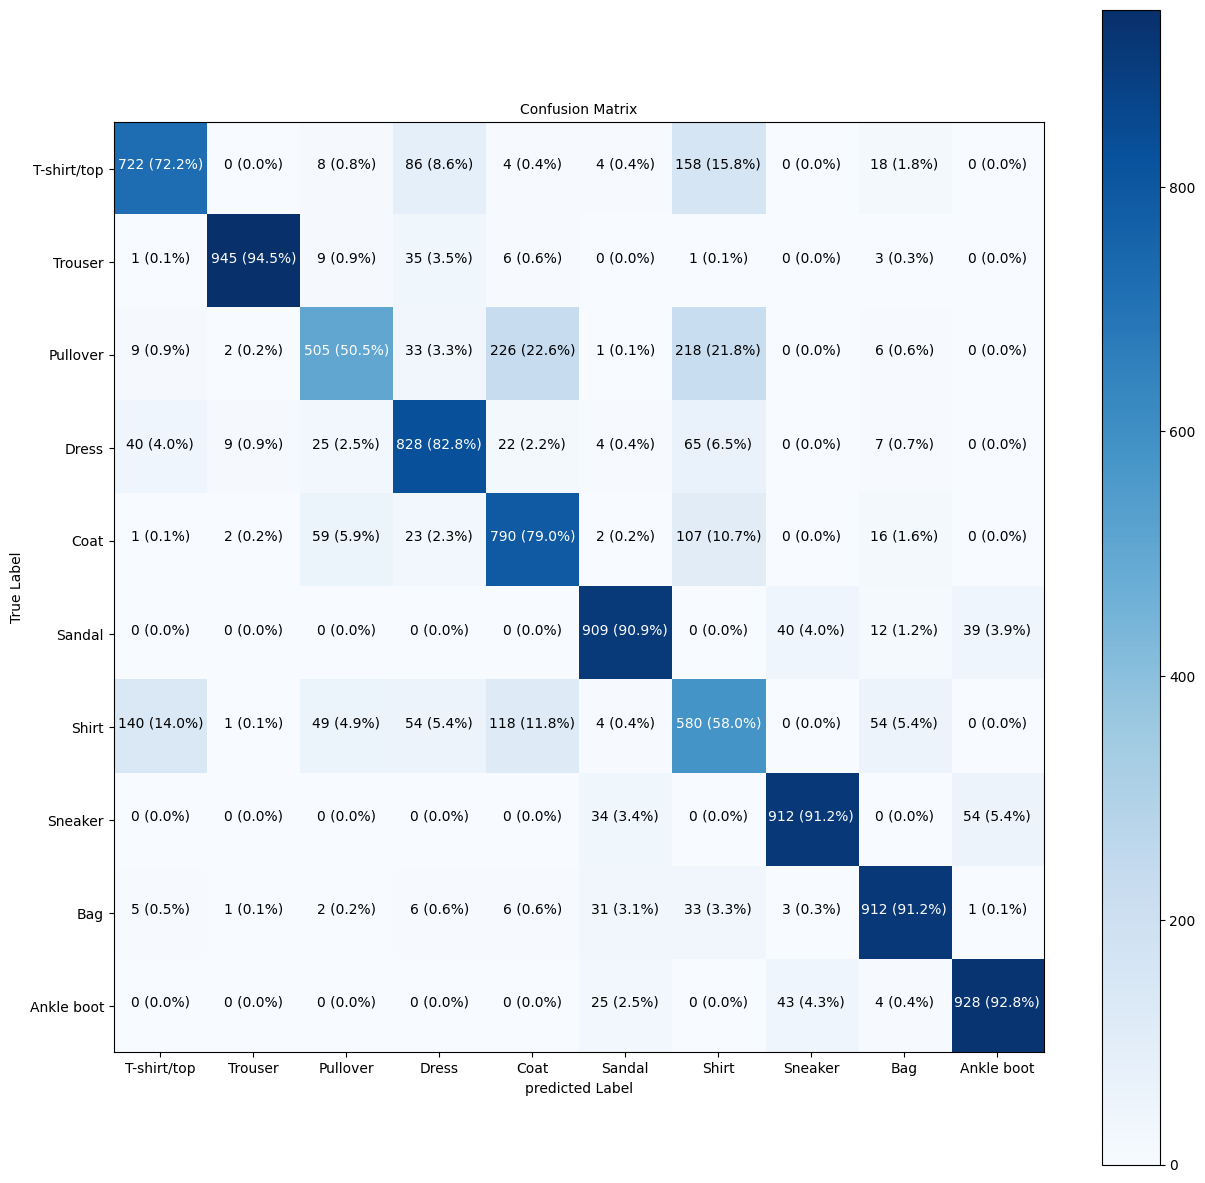

In [ ]:
# make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

How about we create a fun little function for:
* plot a random image
* make a predction on said image
* Lbel the plot with the truth label & the predicted label


In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and turth label.
  """

  # set up  random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color fo the true of the titles depending on if the predictions is right or wring
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
             color=color)


1/1 [==============================] - 0s 19ms/step


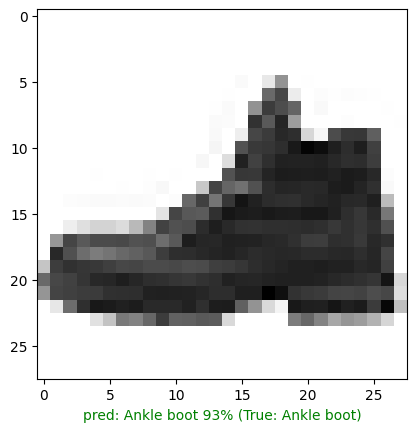

In [ ]:
# check out a random image as well as its prediction
plot_random_image(model=model_16,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What pattern is our model learning?

In [ ]:
# Fnd thelayers of our most recent model
model_16.layers

In [ ]:
# Extract a particular layer
model_16.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_16.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.43081403,  0.5448494 , -0.5775126 , -0.10080696],
        [ 0.3922524 ,  0.45453742, -0.7053051 , -1.2076246 ],
        [ 0.15072723,  0.8801253 , -0.6266828 , -0.4760276 ],
        ...,
        [-0.7180073 ,  0.11662965, -0.54519004, -0.06165753],
        [-0.76677376, -0.4081624 , -0.57950014,  0.34263736],
        [ 0.6902737 ,  0.67960775, -0.6624488 ,  0.36475632]],
       dtype=float32),
 (784, 4))

In [ ]:
model_16.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 4)                 3140      
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out the bias vector...

In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([1.1418314, 0.7438237, 0.5760079, 1.6575913], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of a Tensorflow Dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
model_16.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 4)                 3140      
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


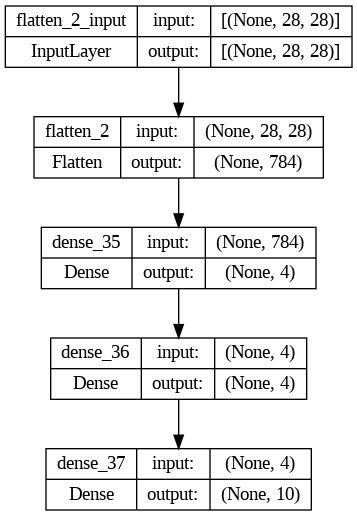

In [ ]:
# Let's check out another way of viewing our deep learnng models
from tensorflow.keras.utils import plot_model

# see the inputs and outputs of each layers
plot_model(model_15, show_shapes=True)